## Used resources for Schunk development

### CAN resources 

* [How to use ros-canopen](https://answers.ros.org/question/233735/how-to-used-ros_canopen/)   
* [canopen_test_utils](https://github.com/ipa320/canopen_test_utils)     
* [schunk_lwa4p_canopen](https://github.com/jlarraez/schunk_lwa4p)    
* [ros_canopen overview](http://wiki.ros.org/ros_canopen)  
* [canopenchain_node_overview](http://wiki.ros.org/canopen_chain_node)   
* [CanOpenBUSLayer](http://wiki.ros.org/canopen_chain_node#Configuration)
* [CANOpen ROS package getting started](https://community.husarion.com/t/canopen-ros-package-getting-started/475/2) 

#### TODO: 
 - [ ] Add special CAN primer on github page

Very good presentation about rosbag api can be found [here](https://www.fer.unizg.hr/_download/repository/lec08-rosbag-ipython.pdf).

In [2]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

## How to setup virtual environment? 

You can setup `virtualenv` quite easily by following instructions on following [link](https://uoa-eresearch.github.io/eresearch-cookbook/recipe/2014/11/26/python-virtual-env/) 

### How to activate virtual environment? 

Run following command inside folder in which you have created virtual environment as follows: `source <virtualenv_name>/bin/activate` 

After that you can use `pip3 install <package_name>` to install neccessary python packages. 

## Read bag

In [3]:
bag_name = "experiment2.bag"

b = bagreader(bag_name)

[INFO]  Data folder experiment2 already exists. Not creating.


### Insert data into csv_files

In [4]:
csv_files = []
for topic in b.topics:
    #print(topic)
    data = b.message_by_topic(topic)
    csv_files.append(data)
    

In [5]:
print(csv_files)

['experiment2/control_arm_node-tool-current_pose.csv', 'experiment2/dynamixel_workbench-dynamixel_state.csv', 'experiment2/dynamixel_workbench-joint_states.csv', 'experiment2/imu1-data.csv', 'experiment2/imu1-mag.csv', 'experiment2/imu2-data.csv', 'experiment2/imu2-mag.csv', 'experiment2/imu3-data.csv', 'experiment2/imu3-mag.csv', 'experiment2/lwa4p-joint_group_position_controller-command.csv', 'experiment2/lwa4p-joint_states.csv', 'experiment2/magnetic_estimation.csv', 'experiment2/magnetic_vector1.csv', 'experiment2/magnetic_vector2.csv', 'experiment2/move_group-goal.csv', 'experiment2/pose_error.csv', 'experiment2/servo_server-delta_twist_cmds.csv', 'experiment2/servo_server-status.csv', 'experiment2/servo_server-target_pose.csv', 'experiment2/start_time.csv', 'experiment2/tf.csv']


In [6]:
tool_pose = pd.read_csv(csv_files[0])
dynamixel_state = pd.read_csv(csv_files[1])
dynamixel_joint_states = pd.read_csv(csv_files[2])
imu1_data = pd.read_csv(csv_files[3])
imu1_mag = pd.read_csv(csv_files[4]) 
imu2_data = pd.read_csv(csv_files[5])
imu2_mag = pd.read_csv(csv_files[6])
imu3_data = pd.read_csv(csv_files[7])
imu3_mag = pd.read_csv(csv_files[8])
servo_joint_cmds = pd.read_csv(csv_files[9])
joint_states = pd.read_csv(csv_files[10])
magnetic_pose_estimation = pd.read_csv(csv_files[11])
magnetic_vector_1 = pd.read_csv(csv_files[12])
magnetic_vector_2 = pd.read_csv(csv_files[13])
move_group_goal = pd.read_csv(csv_files[14])
pose_error = pd.read_csv(csv_files[15])
delta_twist_cmds = pd.read_csv(csv_files[16])
servo_status = pd.read_csv(csv_files[17])
target_pose = pd.read_csv(csv_files[18])
start_time = pd.read_csv(csv_files[19])
# No end time? 

### How to plot pandas dataframe with matpotlib? 

Instructions for plotting pandas dataframe with matplotlib can be found [here](https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html)

More documentation about plotting matplolib can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) 

In [7]:
def get_series_by_key_from_df(dataframe, key):
    """
         dataframe: pandas dataframe that contains measurements 
         key: key by which we extract dataseries
    """
    series_list = []
    for column in dataframe.columns:
        if key in str(column): 
            series_list.append(dataframe["{}".format(column)])
    return series_list

def plot_series(time, series, scale_time=False):
    """
        time: pandas series for time 
        series: pandas series for measurement 
        scale_time: boolean for scaling time to 0-duration scale (if not use_sim_time active)
    """
    plt.figure()
    assert(len(time) == len(series)), "Please check your data lengths"        
    
    #if use_sim_time = False 
    if scale_time:
        time = [t - time[0] for t in time]
        
    plt.plot(time, series)
    plt.grid(color='0.95')
    plt.title('{}'.format(series.name))
    plt.show()  


def plot_multiple_series(time, series_list, series_names = None, config_dict = None, scale_time=False, save_fig=False, save_name=None):
    """
        time: pandas series for time 
        series_list: list containing pandas series
        series_names: list containing names for each series that's going to be plotted
        config_dict: dictionary containing config params
        scale_time: boolean for scaling time to 0-duration scale (if not use_sim_time active)
    
    """
    
    if config_dict: 
        title = config_dict['title']
        x_label = config_dict['x_label']
        y_label = config_dict['y_label']
        width, height = config_dict['w'], config_dict['h']
        use_legend = config_dict['use_legend']
        grid = config_dict['grid']
        f_size = config_dict['font_size']
        line_width = config_dict["linewidth"]
        legend_width = config_dict["legendwidth"]
        #ref_plot = True
        
    else:
        title="graph"
        x_label = "t"
        y_label = "data"
        width, height = 5, 5
        use_legend = False
        grid = False
        ref_plot = False
        line_width = 1
        legend_width = None
    
    # Create figure
    plt.figure(figsize=(width, height))
    # Check if len of time is same as len of series (plotting condition)
    for i, series in enumerate(series_list):
        if (len(time) != len(series)): 
            print("time length: \t series length: {}", len(time), len(series))
            #print("Series {} length is: {}".format(series_names[i], len(series)))
        if (len(time) < len(series)):
            series_list[i] = series[:len(time)]
        if (len(series) < len(time)):
            time = time[:len(series)]
    
    # Scale time to secs if use_sim_time=False (e.g. real_robot)
    if scale_time:
        time = [t - time[0] for t in time]    
        
    # Plot series 
    # https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
    if use_legend: 
        for series_name, series_value in zip(series_names, series_list):
            # Condition for setpoint plotting
            if "sp" in series_name:
                plt.plot(time, series_value, label=series_name, linestyle="-.")
            else:
                plt.plot(time, series_value, label=series_name, linewidth=line_width)
    else:
        for series_value in series_list:
            if "sp" in series_name:
                plt.plot(time, series_value,label=series_name, linestyle="-.")
            else: 
                plt.plot(time, series_value, label=series_name, linewidth=line_width)
    
    if grid: 
        plt.grid(color="grey")
    if use_legend: 
        leg = plt.legend(loc ="best")
        if legend_width: 
            for legobj in leg.legendHandles:
                legobj.set_linewidth(legend_width)
                
            
        
    plt.title(title, fontsize=round(1.2*f_size))
    plt.xlabel(x_label, fontsize=f_size)
    plt.ylabel(y_label, fontsize=f_size)    
        
    if save_fig: 
        plt.savefig("{}.jpg".format(save_name))
        
    plt.show()


    

## Crop one list to another

Idea is to check how does manipulation servoing follows reference. Servoing reference lasts only when action server is active, 
therefore it's not possible to correctly compare joint states.

In [8]:
def scale_any_time(time):    
    scaled_time = pd.Series([t - time[0] for t in time])    
    return scaled_time

# They're not subset because time is not so correct
def check_if_subset(s1, s2):
    res = s1.isin(pd.to_numeric(s2, errors='coerce')).all()
    return res

# Get servoing start time
def get_start_end_time(time):
    start_time, end_time = time.values[0], time.values[-1]
    return start_time, end_time

# Get frequency of the series
def get_frequency(time):
    
    print(type(time))
    start_time = time.values[0]
    time = [t - start_time for t in time.values]
    frequency = 1/(max(time)/len(time))
    return frequency

# Get duration for the series
def get_duration(time):

    time = [t - min(time) for t in time]
    return(max(time))


# Crop dataframe from whole joint states to catch part where we have servoing 
def crop_dfs(t_s1, t_s2, df_1, df_2):
    """
        t_s1: pd Series of longer time 
        t_s2: pd Series of shorter time
        df_1: dataframe of longer time
        df_2: dataframe of shorter time
        
        Condition is that both measurements are in same frequency. That's current implementation, 
        but it could be scaled to some degree. 
        Currently such situation is not neccessary because I want to use same frequency for stuff like that. 
        
        returns: cropped longer dataframe!
    
    """
    
    f1 = get_frequency(t_s1)
    f2 = get_frequency(t_s2)
    
    debug_info = True
    if debug_info:
        print("t1 len: {}".format(len(t_s1)))
        print("df1 len: {}".format(len(df_1)))
        print("t2 len: {}".format(len(t_s2)))
        print("df2 len: {}".format(len(df_2)))
        print("f1: {}".format(f1))
        print("f2: {}".format(f2))
    
    # Get relative start and end time 
    start_t_cmd, end_t_cmd = get_start_end_time(t_s2)    
        
    
    # Get times in relation to start time and end_time of servoing
    start_diff_list = [t - start_t_cmd for t in t_s1]
    end_diff_list = [t - end_t_cmd for t in t_s1]
              
    # Find closest start element
    closest_start_element = min([t if t > 0 else 1000 for t in start_diff_list])
    
    # Find closest end element
    closest_end_element = min([t if t > 0 else 1000 for t in end_diff_list])
    
    
    # Find out index of a closest element
    start_index_ = list(time_s).index(closest_start_element + start_t_cmd)        
    end_index_ = list(time_s).index(closest_end_element + end_t_cmd)
    
    if debug_info: 
        print("Closest start index is: {}".format(start_index_))
        print("Closest end index is: {}".format(end_index_))
    
    # Truncate https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.truncate.html
    df_1 = df_1.truncate(before = start_index_)
    df_1 = df_1.truncate(after=end_index_ + 1)   
    
    
    return df_1    
    

### Servo cmds

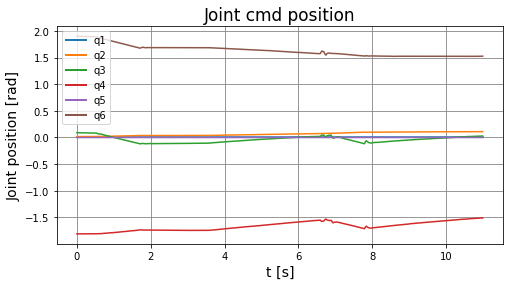

In [13]:
time_servo = servo_joint_cmds["Time"]
series_names = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']
series_list = get_series_by_key_from_df(servo_joint_cmds, "data")

config_dict = {
               "title":"Joint cmd position", 
               "x_label":"t [s]",
               "y_label": "Joint position [rad]",
               "w": 8,
               "h": 4,
               "use_legend":True,
               "font_size": 14, 
               "grid":True, 
               "linewidth": 1.5, 
               "legendwidth": 2
              }

plot_multiple_series(time_servo, series_list, series_names, config_dict, scale_time=True)

### Plot joint states positions

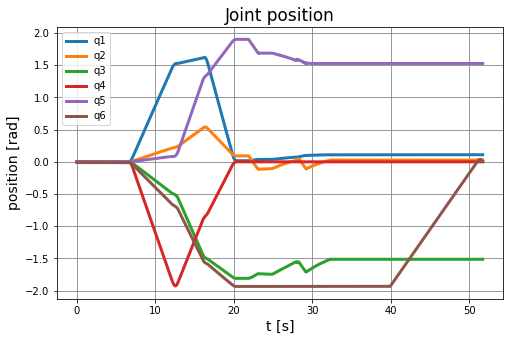

In [14]:
time_full = joint_states['Time']
series_list = get_series_by_key_from_df(joint_states, "position")

config_dict = {
               "title":"Joint position", 
               "x_label":"t [s]",
               "y_label": "position [rad]",
               "w": 8,
               "h": 5,
               "use_legend":True,
               "font_size": 14, 
               "grid":True, 
               "linewidth": 3, 
               "legendwidth": 3
              }

plot_multiple_series(time_full, series_list, series_names, config_dict, scale_time=True)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
t1 len: 2069
df1 len: 2069
t2 len: 420
df2 len: 420
f1: 40.01517076808933
f2: 38.22847717472994
Closest start index is: 853
Closest end index is: 1292
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
t1 len: 2069
df1 len: 2069
t2 len: 420
df2 len: 420
f1: 40.01517076808933
f2: 38.22847717472994
Closest start index is: 853
Closest end index is: 1292
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
t1 len: 2069
df1 len: 2069
t2 len: 420
df2 len: 420
f1: 40.01517076808933
f2: 38.22847717472994
Closest start index is: 853
Closest end index is: 1292
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
t1 len: 2069
df1 len: 2069
t2 len: 420
df2 len: 420
f1: 40.01517076808933
f2: 38.22847717472994
Closest start index is: 853
Closest end index is: 1292
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
t1 len: 2069
df1 len: 2069
t2 len: 4

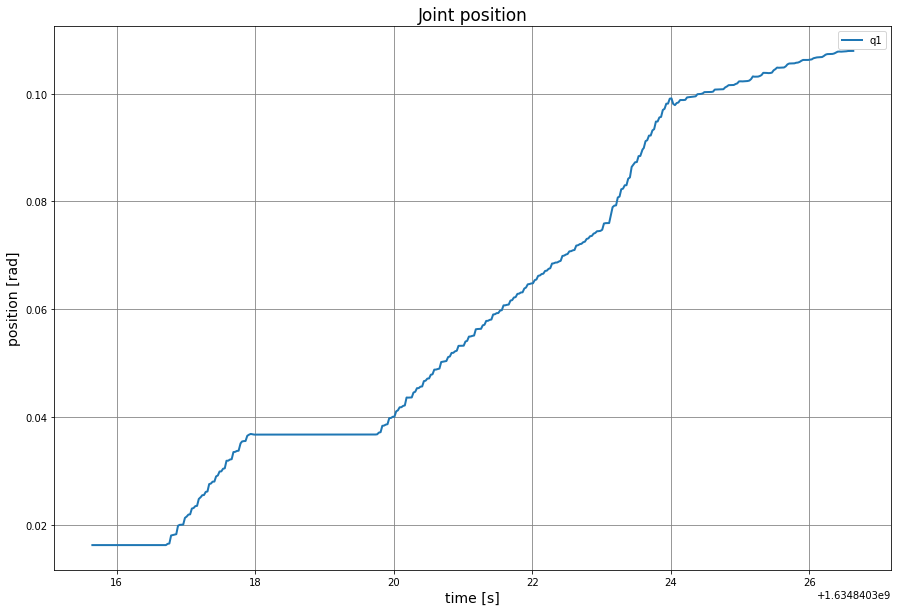

In [15]:
time_s =  joint_states["Time"]
time_s_cmd = servo_joint_cmds["Time"]
series_cmd_list = get_series_by_key_from_df(servo_joint_cmds, "data")
series_list = get_series_by_key_from_df(joint_states, "position")

###################################
# Wrong joint states is recorded! #
###################################

q1 = series_list[0]
q2 = series_list[1]
q3 = series_list[2]
q4 = series_list[3]
q5 = series_list[4]
q6 = series_list[5]

q1_sp = series_cmd_list[0] # --> shouldn't be 10 Hz, check this!
q2_sp = series_cmd_list[1]
q3_sp = series_cmd_list[2]
q4_sp = series_cmd_list[3]
q5_sp = series_cmd_list[4]
q6_sp = series_cmd_list[5]

q1 = crop_dfs(time_s, time_s_cmd, q1, q1_sp) 
q2 = crop_dfs(time_s, time_s_cmd, q2, q2_sp)
q3 = crop_dfs(time_s, time_s_cmd, q3, q3_sp)
q4 = crop_dfs(time_s, time_s_cmd, q4, q4_sp)
q5 = crop_dfs(time_s, time_s_cmd, q5, q5_sp)
q6 = crop_dfs(time_s, time_s_cmd, q6, q6_sp)


print(len(q1))
print(len(q1_sp))

config_dict = {
               "title":"Joint position", 
               "x_label":"time [s]",
               "y_label": "position [rad]",
               "w": 15,
               "h": 10,
               "use_legend":True,
               "font_size": 14, 
               "grid":True, 
               "linewidth": 2,
               "legendwidth": 2

              }


pos_list = [q1, q1_sp] # q2, q3, q4, q5, q6]
names = ["q1"]  # "q2", "q3", "q4", "q5", "q6"]

# Plot multiple series method for joint positions or something like that 
plot_multiple_series(time_s_cmd, pos_list, names, config_dict)

## Plot multiple series using subplot

Great documentation from matplotlib for plotting multiple series can be found here: 
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html  
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html  

    
    
    
    
    
    

<class 'dict'>
Time dimension is:  420
Series len is:  420
Time dimension is:  420
Series len is:  441


ValueError: x and y must have same first dimension, but have shapes (420,) and (441,)

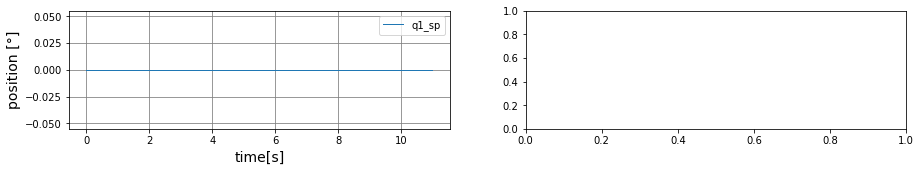

In [16]:
# Mostly neccessary for exploring setpoint and measurement relation                          
def plot_multiple_series_wth_subplotting(time, series_list, 
                                         series_name, n_rows, 
                                         n_columns, config_dict = {}, 
                                         reference=False):
    """
        time: 
        series_list: 
        series_names: 
        nrows: 
        ncol: 
        config_dict:
    
    """    
     
    print(type(config_dict))    
    if config_dict: 
        title = config_dict["title"]
        x_label = config_dict["x_label"]
        y_label = config_dict["y_label"]
        width, height = config_dict["w"], config_dict["h"]
        use_legend = config_dict["use_legend"]
        grid = config_dict["grid"]
        f_size = config_dict["font_size"]
        line_width = config_dict["linewidth"]
        
    else: 
        title = ""
        x_label = "t"
        y_label = "joint_position"
        width, height = 15, 15
        use_legend = False
        grid = True
        f_size = 12  
        line_width = 1
            
    
    plt.figure(figsize=(width, height))
    n = 1
    for i in range(n_rows): 
        for j in range(n_columns):
                
            # Plot one plot
            plt.subplot(n_rows, n_columns, n)
            debug = True
            if debug: 
                print("Time dimension is: ", len(time))
                print("Series len is: ", len(series_list[n - 1]))
            plt.plot(time, series_list[n - 1], label=series_name[n - 1], linewidth=line_width)
                
            # Configuration stuff 
            if grid: 
                plt.grid(color="grey")
            if use_legend: 
                plt.legend(loc ="best")
            if x_label: 
                plt.xlabel("time[s]", fontsize=f_size)
            if y_label:
                plt.ylabel("position [°]".format(n), fontsize=f_size)
               
            n += 1; j += 1
        i += 1
        
    if title:
        plt.set_title("Joint position")                   
                    
            
    plt.show() 

    
# Config dict    
config_dict_ = {"title":"Joint position", 
               "x_label":"time [s]",
               "y_label": "position [rad]",
               "w": 15,
               "h": 10,
               "use_legend":True,
               "font_size": 14, 
               "grid":True, 
               "linewidth":1,
               "legendwidth": 2
              }
    
    
time_s_cmd = servo_joint_cmds["Time"]
scaled_t = scale_any_time(time_s_cmd)

pos_list = [q1_sp, q1,
            q2_sp, q2,
            q3_sp, q3, 
            q4_sp, q4
           ]

names = ["q1_sp", "q1",
         "q2_sp", "q2",
         "q3_sp", "q3",
         "q4_sp", "q4"]

n_rows = 4
n_columns = 2

plot_multiple_series_wth_subplotting(scaled_t, pos_list, names, n_rows, n_columns, config_dict=config_dict_, reference=False)


# Development ideas: 
- [x] simple plot series method 
- [x] complicated plot series metod (assertions, legend, grid, time plotting)
- [x] plot multiple series method 
- [x] align two measurements taken time in cosideration (added start_truncation, but end doesn't work) 
- [x] add subplot plotting method 
- [ ] enable reference plotting for subplots 
- [ ] add titles to subplotting 
- [ ] different sytnax for subplotting 

## Experiments

#### Load bag


In [75]:
bag_name = "experiment2.bag"

b = bagreader(bag_name)
csv_files = []


for topic in b.topics:
    data = b.message_by_topic(topic)
    csv_files.append(data)

[INFO]  Data folder experiment2 already exists. Not creating.


In [93]:
tool_pose = pd.read_csv(csv_files[0])
dynamixel_state = pd.read_csv(csv_files[1])
dynamixel_joint_states = pd.read_csv(csv_files[2])
imu1_data = pd.read_csv(csv_files[3])
imu1_mag = pd.read_csv(csv_files[4]) 
imu2_data = pd.read_csv(csv_files[5])
imu2_mag = pd.read_csv(csv_files[6])
imu3_data = pd.read_csv(csv_files[7])
imu3_mag = pd.read_csv(csv_files[8])
servo_joint_cmds = pd.read_csv(csv_files[9])
joint_states = pd.read_csv(csv_files[10])
magnetic_pose_estimation = pd.read_csv(csv_files[11])
magnetic_vector1 = pd.read_csv(csv_files[12])
magnetic_vector2 = pd.read_csv(csv_files[13])
move_group_goal = pd.read_csv(csv_files[14])
pose_error = pd.read_csv(csv_files[15])
delta_twist_cmds = pd.read_csv(csv_files[16])
servo_status = pd.read_csv(csv_files[17])
target_pose = pd.read_csv(csv_files[18])
start_time = pd.read_csv(csv_files[19])
# No end time? 



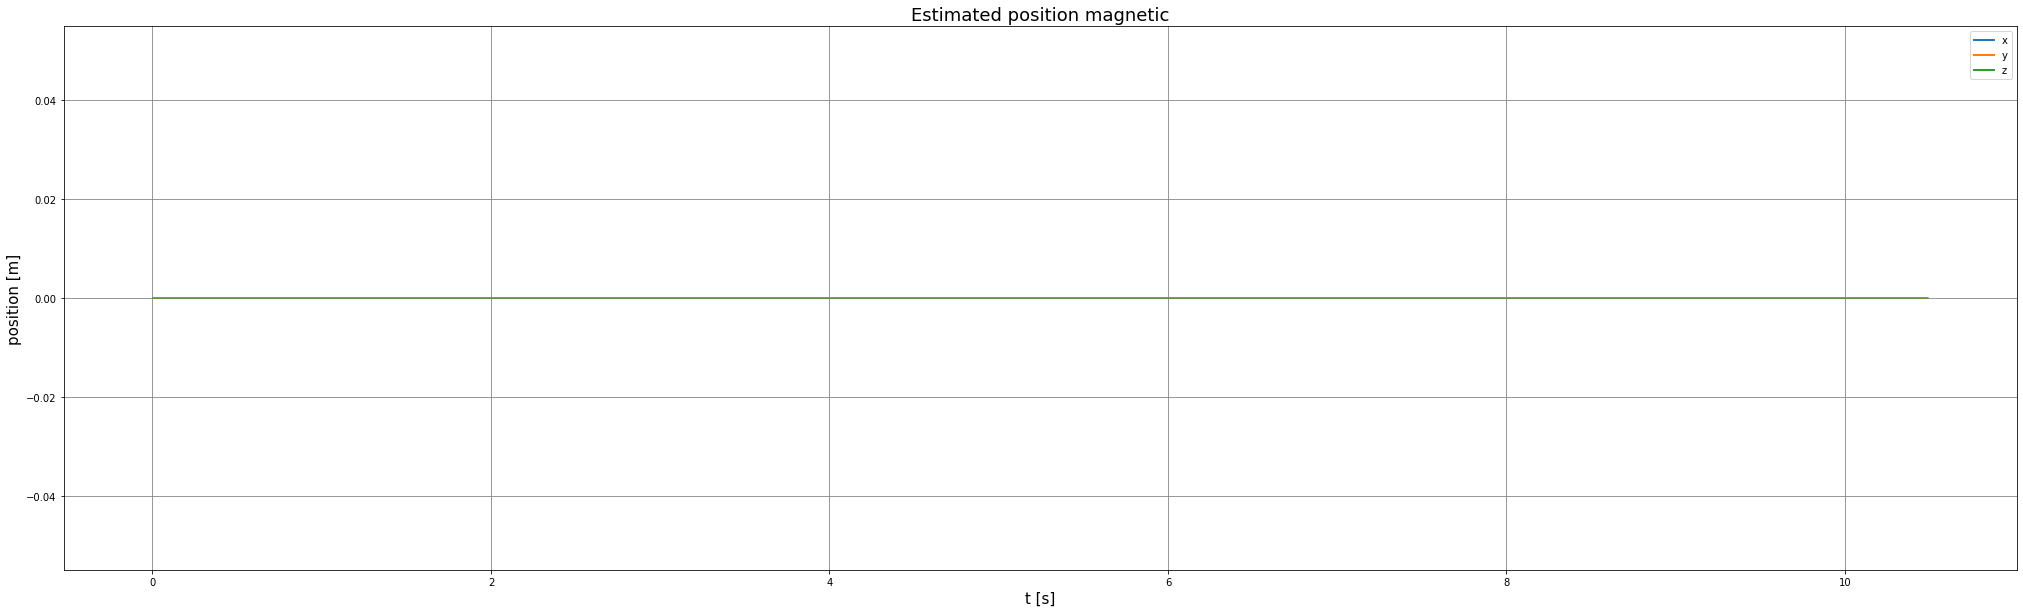

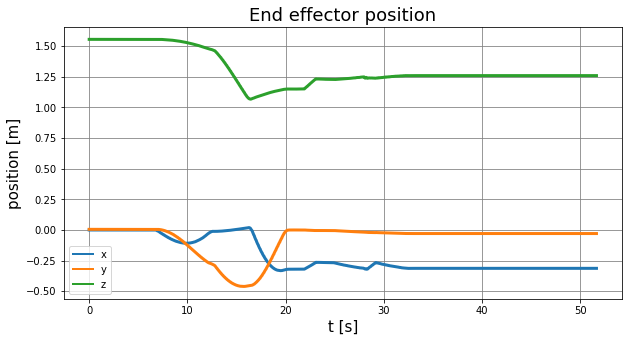

In [77]:
#plot_series(magnetic_estimation['Time'], magnetic_estimation['pose.position.x']) --> use goal frame for magnetic estimation 
#plot_multiple_series()

mag_series_list = get_series_by_key_from_df(magnetic_pose_estimation, "position")
config_dict = {
               "title":"Estimated position magnetic", 
               "x_label":"t [s]",
               "y_label": "position [m]",
               "w": 35,
               "h": 10,
               "use_legend":True,
               "font_size": 15, 
               "grid":True, 
               "linewidth": 1, 
               "legendwidth": 2

              }


duration = get_duration(magnetic_pose_estimation['Time'])

mag_est_names = ["x", "y", "z"]
plot_multiple_series(magnetic_pose_estimation['Time'], mag_series_list,
                     mag_est_names, config_dict, scale_time=True,
                     save_fig=True, save_name="estimated_position1")

tool_pose_list = get_series_by_key_from_df(tool_pose, "position")
orientation_pose_list = get_series_by_key_from_df(tool_pose, "orientation")

config_dict = {
               "title":"End effector position", 
               "x_label":"t [s]",
               "y_label": "position [m]",
               "w": 10,
               "h": 5,
               "use_legend":True,
               "font_size": 15, 
               "grid":True, 
               "linewidth": 3, 
               "legendwidth": 2 
              }
tool_position_names = ["x", "y", "z"]
plot_multiple_series(tool_pose['Time'], tool_pose_list, 
                    tool_position_names, config_dict, scale_time=True, 
                    save_fig=True, save_name="joint_position")


Font 'default' does not have a glyph for '\x08' [U+8], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\x08' [U+8], substituting with a dummy symbol.


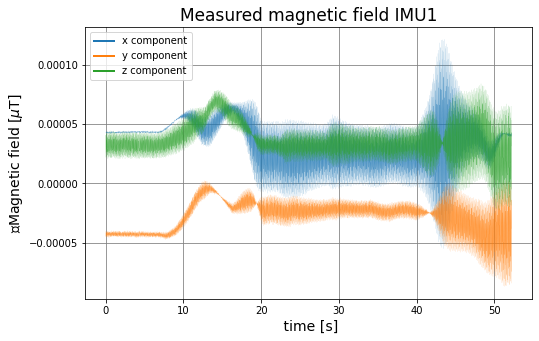

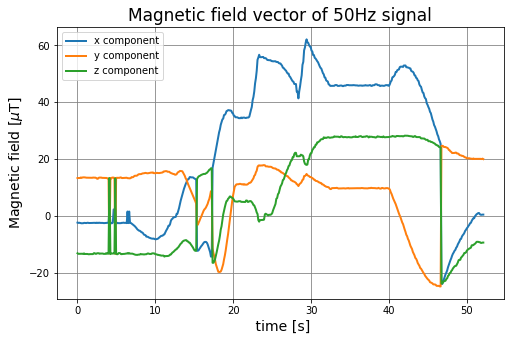

In [94]:
################################################################
################## IMU MAGNETIC FIELD ##########################
################################################################

imu1_config_dict = {
               "title": "Measured magnetic field IMU1", 
               "x_label": " time [s]",
               "y_label": "\bMagnetic field [$\mu$T]",
               "w": 8,
               "h": 5,
               "use_legend":True,
               "font_size": 14, 
               "grid":True, 
               "linewidth": 0.1,
               "legendwidth": 2
              }



imu1_t = imu1_mag['Time']


imu_mag_1 = get_series_by_key_from_df(imu1_mag, "magnetic_field")
# Multiply by 10^6



plot_multiple_series(imu1_t, imu_mag_1,
                     mag_imu_names, imu1_config_dict,
                     scale_time=True, save_fig=True, save_name="imu1")


imu1_config_dict = {
               "title": "Magnetic field vector of 50Hz signal", 
               "x_label": " time [s]",
               "y_label": r"Magnetic field [$\mu$T]",
               "w": 8,
               "h": 5,
               "use_legend":True,
               "font_size": 14, 
               "grid":True, 
               "linewidth": 2,
               "legendwidth": 2
              }

mag_vector1 = get_series_by_key_from_df(magnetic_vector1, "magnetic_field.")
plot_multiple_series(magnetic_vector1['Time'], mag_vector1, 
                     mag_imu_names, imu1_config_dict, 
                     scale_time=True, save_fig=True, save_name="magnetic_vector1")



# TODO: Add magnetic vectors! Maybe to this plots, and maybe to some other plots 



In [ ]:
mag_imu_names = ["x component", "y component", "z component"]

imu2_t = imu2_mag['Time']
imu3_t = imu3_mag['Time']

imu2_config_dict = imu1_config_dict.copy()
imu2_config_dict['title'] = "Measured magnetic field IMU2"

imu3_config_dict = imu1_config_dict.copy()
imu3_config_dict['title'] = "Measured magnetic field IMU3"


imu_mag_2 = get_series_by_key_from_df(imu2_mag, "magnetic_field")

plot_multiple_series(imu2_t, imu_mag_2,
                     mag_imu_names, imu2_config_dict,
                     scale_time=True, save_fig=True, save_name="imu2")

imu_mag_3 = get_series_by_key_from_df(imu3_mag, "magnetic_field")

plot_multiple_series(imu3_t, imu_mag_3,
                     mag_imu_names, imu3_config_dict,
                     scale_time=True, save_fig=True, save_name="imu3")

In [ ]:
ee_velocity_list = [delta_twist_cmds['twist.linear.x'], delta_twist_cmds['twist.linear.y'], delta_twist_cmds['twist.linear.z']]
ee_names = ['vel_x', 'vel_y', 'vel_z']

#delta_twist_cmds

ee_config_dict = {
               "title":"End effectory velocity", 
               "x_label":" time [s]",
               "y_label": "Velocity [m/s]",
               "w": 20,
               "h": 10,
               "use_legend":True,
               "font_size": 14, 
               "grid":True, 
               "linewidth": 1.5, 
               "legendwidth": 2
              }

plot_multiple_series(delta_twist_cmds['Time'], ee_velocity_list, 
                     ee_names, ee_config_dict, scale_time=False)

In [ ]:
arm_current_position_list = [tool_pose['position.x'], tool_pose['position.y'], tool_pose['position.z']]
arm_current_position_names = ['ee_x_m', 'ee_y_m', 'ee_z_m']

arm_pos_dict = {
               "title":"End effector position", 
               "x_label":" time [s]",
               "y_label": "Position [m]",
               "w": 20,
               "h": 10,
               "use_legend":True,
               "font_size": 18, 
               "grid":True, 
               "linewidth": 1, 
               "legendwidth": 2
              }

plot_multiple_series(tool_pose['Time'], arm_current_position_list,
                     arm_current_position_names, arm_pos_dict, scale_time=True)

## 3D trajectory plotting 


In [42]:
from mpl_toolkits import mplot3d

#tool_pose = pd.read_csv(csv_files[0])


In [43]:
print(tool_pose)

              Time  position.x  position.y  position.z  orientation.x  \
0     1.633093e+09   -0.000027    0.005262    1.555000   2.558070e-11   
1     1.633093e+09   -0.000027    0.005262    1.555000   2.558070e-11   
2     1.633093e+09   -0.000027    0.005262    1.555000   2.558070e-11   
3     1.633093e+09   -0.000027    0.005262    1.555000   2.558070e-11   
4     1.633093e+09   -0.000027    0.005262    1.555000   2.558070e-11   
...            ...         ...         ...         ...            ...   
2897  1.633093e+09   -0.322175   -0.298185    1.094532   1.063270e-01   
2898  1.633093e+09   -0.322175   -0.298185    1.094532   1.054753e-01   
2899  1.633093e+09   -0.322175   -0.298185    1.094532   1.050150e-01   
2900  1.633093e+09   -0.322175   -0.298185    1.094532   1.041585e-01   
2901  1.633093e+09   -0.322175   -0.298185    1.094532   1.037417e-01   

      orientation.y  orientation.z  orientation.w  
0     -2.645255e-09       0.999982       0.006025  
1     -2.645255e-09

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x_data_min: -0.3780613298102622
x_data_max: 0.2485765204726869
y_data_min: -0.4465447466365975
y_data_max: 0.5921709395692938
z_data_min: 1.085405487176625
z_data_max: 1.5549999995512669
xdata len: 2902


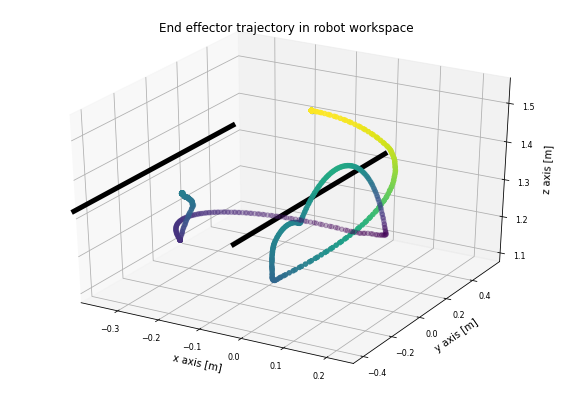

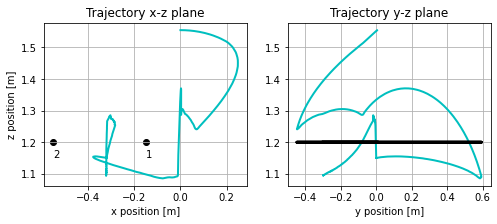

In [75]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')

zline = np.linspace(1, 2, 1000)
xline = np.linspace(-0.5, 0.1, 1000)
yline = np.linspace(-0.3, 0.3, 1000)

power1_x_line = np.ones(1000) * -0.15
power1_y_line = np.linspace(-0.1, 1.0, 1000)
power2_x_line = np.ones(1000) * -0.55
power_z_line = np.ones(1000) * 1.2

#ax.plot3D(xline, yline, zline)

xdata = tool_pose['position.x']
ydata = tool_pose['position.y']
zdata = tool_pose['position.z']

print("x_data_min:", min(xdata))
print("x_data_max:", max(xdata))
print("y_data_min:", min(ydata))
print("y_data_max:", max(ydata))
print("z_data_min:", min(zdata))
print("z_data_max:", max(zdata))
lim_point = 1500
ax.scatter3D(xdata[:lim_point], ydata[:lim_point], zdata[:lim_point], c=zdata[:lim_point] )
ax.scatter3D(xdata[0], ydata[0], zdata[0], )
# Set labels 
ax.set_title('End effector trajectory in robot workspace')
ax.set_xlabel('x axis [m]');
ax.set_ylabel('y axis [m]'); 
ax.set_zlabel('z axis [m]');
ax.tick_params(axis='both', which='major', labelsize=8)


# Set limits
ax.set_xlim(min(xdata), max(xdata))
ax.set_ylim(min(ydata), max(ydata))
ax.set_zlim(min(zdata), max(zdata))


print("xdata len: {}".format(len(xdata)))
#print("power1_y_line: {}".format(len(power1_y_line)))

# Plot powerlines 
ax.plot3D(power1_x_line, power1_y_line, power_z_line, color="black", linewidth=5)
ax.plot3D(power2_x_line, power1_y_line, power_z_line, color="black", linewidth=5)


plt.savefig("trajectory3D.jpg")

# Subplots for trajectory of robotic manipulator #
##################################################
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey='col', sharex=True)
fig.set_size_inches(8, 3)
ax1 = plt.subplot(121)
ax1.plot(tool_pose['position.x'], tool_pose['position.z'], 'c', linewidth=2)
ax1.scatter(-0.15, 1.2, c="k")
ax1.scatter(-0.55, 1.2, c="k")
ax1.text(-0.15, 1.15, "1")
ax1.text(-0.55, 1.15, "2")
ax1.set_title("Trajectory x-z plane")
ax1.grid(True)
ax1.set_ylabel('z position [m]')
ax1.set_xlabel('x position [m]')

ax2 = plt.subplot(122)
ax2.plot(tool_pose['position.y'], tool_pose['position.z'], 'c', linewidth=2)
ax2.plot(tool_pose['position.y'], np.linspace(1.2, 1.2, len(tool_pose['position.y'])), c="black", linewidth=3)
ax2.set_title("Trajectory y-z plane")
ax2.grid(True)
ax2.set_xlabel('y position [m]')

plt.savefig("trajectory.jpg")


In [ ]:
config_dict = {"x_min": -0.1, 
               "x_max": 0.1, 
               "y_min": -0.5, 
               "y_max": 0.5, 
               "z_min": 0.0, 
               "z_max": 1.6, 
               "num_points": 1000
              }

#https://matplotlib.org/2.0.2/examples/mplot3d/text3d_demo.html
def plot_3d(config_dict, pose_pd):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    x_min = config_dict["x_min"]; x_max = config_dict["x_max"]
    y_min = config_dict["y_min"]; y_max = config_dict["y_max"]
    z_min = config_dict["z_min"]; z_max = config_dict["z_max"]
    num_points = config_dict["num_points"]
    
    # Axes
    zline = np.linspace(z_min, z_max, num_points)
    xline = np.linspace(x_min, x_max, num_points)
    yline = np.linspace(y_min, y_max, num_points)
    
    
    ax.plot3D(xline, yline, zline, 'gray')
    
    xdata = pose_pd['position.x']
    ydata = pose_pd['position.y']
    zdata = pose_pd['position.z']
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

['experiment2/control_arm_node-tool-current_pose.csv', 'experiment2/dynamixel_workbench-dynamixel_state.csv', 'experiment2/dynamixel_workbench-joint_states.csv', 'experiment2/imu1-data.csv', 'experiment2/imu1-mag.csv', 'experiment2/imu2-data.csv', 'experiment2/imu2-mag.csv', 'experiment2/imu3-data.csv', 'experiment2/imu3-mag.csv', 'experiment2/lwa4p-joint_group_position_controller-command.csv', 'experiment2/lwa4p-joint_states.csv', 'experiment2/magnetic_estimation.csv', 'experiment2/magnetic_vector1.csv', 'experiment2/magnetic_vector2.csv', 'experiment2/move_group-goal.csv', 'experiment2/pose_error.csv', 'experiment2/servo_server-delta_twist_cmds.csv', 'experiment2/servo_server-status.csv', 'experiment2/servo_server-target_pose.csv', 'experiment2/start_time.csv', 'experiment2/tf.csv']

In [ ]:
# Plot delta_twist_cmds 

show = False
# Plot cmd for tool speed
if show: 
    
    plot_series(delta_twist_cmds["Time"], delta_twist_cmds['twist.linear.x'], True)
    plot_series(delta_twist_cmds["Time"], delta_twist_cmds['twist.linear.y'], True)
    plot_series(delta_twist_cmds["Time"], delta_twist_cmds['twist.linear.z'], True)
    plot_series(delta_twist_cmds["Time"], delta_twist_cmds['twist.angular.x'], True)
    plot_series(delta_twist_cmds["Time"], delta_twist_cmds['twist.angular.y'], True)
    plot_series(delta_twist_cmds["Time"], delta_twist_cmds['twist.angular.z'], True)


    # Plot target pose from action server 
    plot_series(target_pose["Time"], target_pose['pose.position.x'], True)
    plot_series(target_pose["Time"], target_pose['pose.position.y'], True)
    plot_series(target_pose["Time"], target_pose['pose.position.z'], True)
    
#print(current_pose)
plot_series(current_pose["Time"], current_pose['position.x'], True)
plot_series(current_pose["Time"], current_pose['position.y'], True)
plot_series(current_pose["Time"], current_pose['position.z'], True)

config_dict = {
               "title":"Joint position", 
               "x_label":"t [s]",
               "y_label": "position [rad]",
               "w": 15,
               "h": 10,
               "use_legend":True,
               "font_size": 14, 
               "grid":True, 
              }

plot_multiple_series(target_pose["Time"], target_pose)

1591
1591
1591


Text(0.5, 1.0, 'Left motor current')

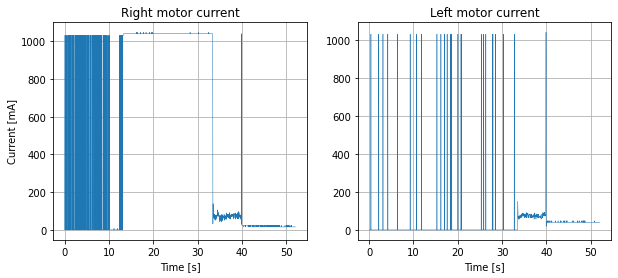

In [61]:
dynamixel_state = pd.read_csv(csv_files[1])

bag = rosbag.Bag('experiment2.bag')

current_motor_1 = []
current_motor_6 = []
for topic, msg, t in bag.read_messages(topics=['/dynamixel_workbench/dynamixel_state']):
    if (msg.dynamixel_state[0].id == 1): 
        current_motor_1.append(msg.dynamixel_state[0].present_current)
    if (msg.dynamixel_state[1].id == 6):
        current_motor_6.append(msg.dynamixel_state[1].present_current)
    
#for topic, msg, t in bag.read_messages():
#    print(topic, msg, t)
print(len(current_motor_1))
print(len(current_motor_6))
print(len(dynamixel_state['Time']))

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey='col', sharex=True)
fig.set_size_inches(10, 4)
ax1 = plt.subplot(121)
ax1.plot(dynamixel_state['Time'] - min(dynamixel_state['Time']), current_motor_1, linewidth=0.5)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Current [mA]')
ax1.grid(True)
ax1.set_title('Right motor current')

ax2 = plt.subplot(122)
ax2.plot(dynamixel_state['Time'] - min(dynamixel_state['Time']), current_motor_6, linewidth=0.5)
ax2.set_xlabel('Time [s]')
ax2.grid(True)
ax2.set_title('Left motor current')

In [12]:
import rosbag